# Mouhamadou Abdoulaye SECK
# abdouseck.tiv@gmail.com

In [1]:
import pandas as pd

# Télachargement du dataset


In [2]:
!git clone https://github.com/Mas2205/Mas2205.git

Cloning into 'Tp1'...


In [5]:
dataset = pd.read_csv("Tp1/data - data.csv")
dataset.shape

(2000, 21)

In [6]:
dataset.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
1,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
2,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
3,1866,0,0.5,0,13,1,52,0.7,185,1,...,356,563,373,14,9,3,1,0,1,0
4,775,0,1.0,0,3,0,46,0.7,159,2,...,862,1864,568,17,15,11,1,1,1,0


# Analyse des données


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
dataset.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [9]:
data = dataset.copy()

<AxesSubplot:>

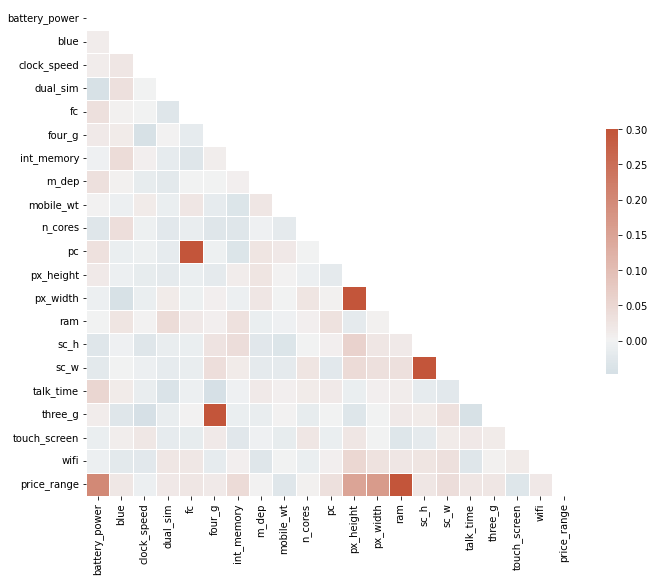

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
dataset_clean = dataset[["price_range","battery_power","px_height","px_width","ram"]]
dataset_clean.head()

,price_range,battery_power,px_height,px_width,ram
0,0,1954,512,1149,700
1,0,1445,386,836,1099
2,0,509,1137,1224,513
3,0,1866,356,563,373
4,0,775,862,1864,568


In [12]:
dataset_clean["price_range"].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [13]:
dataset_clean = dataset[["price_range","battery_power","px_height","px_width","ram"]]
dataset_clean.head()

,price_range,battery_power,px_height,px_width,ram
0,0,1954,512,1149,700
1,0,1445,386,836,1099
2,0,509,1137,1224,513
3,0,1866,356,563,373
4,0,775,862,1864,568


In [14]:
y = dataset_clean["price_range"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1995    3
1996    3
1997    3
1998    3
1999    3
Name: price_range, Length: 2000, dtype: int64

In [15]:
X = dataset_clean[["battery_power","px_height","px_width","ram"]]
X

,battery_power,px_height,px_width,ram
0,1954,512,1149,700
1,1445,386,836,1099
2,509,1137,1224,513
3,1866,356,563,373
4,775,862,1864,568
...,...,...,...,...
1995,1882,4,743,3579
1996,1467,888,1099,3962
1997,858,528,1416,3978
1998,1911,868,1632,3057


In [18]:
from sklearn import preprocessing
scaler_X = preprocessing.StandardScaler().fit(X)
scaler_X = scaler_X.transform(X)
scaler_X

array([[ 1.6286545 , -0.30001588, -0.23725421, -1.31329133],
       [ 0.47001498, -0.58401083, -0.96163801, -0.94536656],
       [-1.660607  ,  1.10868926, -0.06367982, -1.48572725],
       ...,
       [-0.86617637, -0.26395303,  0.38067063,  1.70940891],
       [ 1.53077336,  0.50238257,  0.88056489,  0.86013895],
       [-1.65833069, -0.3653798 , -1.15141268,  1.65500399]])

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaler_X,y,random_state = 12,test_size=0.25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1500, 4) (500, 4) (1500,) (500,)


Le score F1 peut être interprété comme une moyenne harmonique de la précision et du rappel, où un score F1 atteint sa meilleure valeur à 1 et son pire score à 0. La contribution relative de la précision et du rappel au score F1 est égale. 

La formule pour le score F1 est la suivante : F1 = 2 * (precision * recall) / (precision + recall)

Le recall est le rapport tp / (tp + fn) où tp est le nombre de vrais positifs et fn le nombre de faux négatifs. Le rappel est intuitivement la capacité du classificateur à trouver tous les échantillons positifs.

Dans la classification multi-label, cette fonction calcule la précision du sous-ensemble : l'ensemble des étiquettes prédites pour un échantillon doit correspondre exactement à l'ensemble correspondant des étiquettes dans y_true.

La précision est le rapport tp / (tp + fp) où tp est le nombre de vrais positifs et fp le nombre de faux positifs. La précision est intuitivement la capacité du classificateur à ne pas étiqueter comme positif un échantillon qui est négatif.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score

clf = LogisticRegression().fit(x_train, y_train)
clf.predict(x_train)

score = clf.score(x_test, y_test)
precision = precision_score(clf.predict(x_test), y_test,average=None)
recall = recall_score(clf.predict(x_test), y_test,average=None)
f1_score_1 = f1_score(clf.predict(x_test), y_test,average=None)
print("precision_score: ", precision*100)
print("recall_score: ", recall*100)
print("f1_score: ", f1_score_1*100)
print("score_total: ", score)


precision_score:  [97.77777778 95.8677686  95.08196721 95.90163934]
recall_score:  [97.05882353 95.8677686  95.08196721 96.69421488]
f1_score:  [97.41697417 95.8677686  95.08196721 96.2962963 ]
score_total:  0.962


In [173]:
np.mean([97.05882353, 95.8677686,  95.08196721, 96.69421488])

96.17569355500001

In [21]:
print("precision: ",117/(117+5),"recall: ",117/(117+4))


precision:  0.9590163934426229 recall:  0.9669421487603306


<AxesSubplot:>

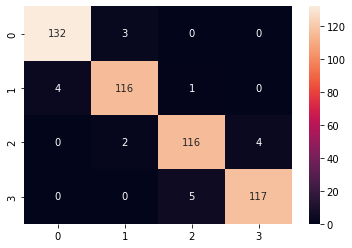

In [22]:
y_pred = clf.predict(x_test)
a = confusion_matrix(y_test,y_pred)
sns.heatmap(a,annot=True,fmt='0')

In [146]:
116/(116+4+2)

0.9508196721311475

In [168]:
def score(matrice,label,typee):
    score=[]
    if typee=="precision":
        mat = matrice[:2,:2]
        score.append(mat[0,0]/(sum(mat[0]))*100)
        for i in range(1,label-1):
            mat = matrice[i-1:i+3,i-1:i+3]
            score.append(mat[1,1]/(sum(mat[1]))*100)
        i=label-1
        mat = matrice[i-1:i+3,i-1:i+3]
        score.append(mat[i-2,i-2]/(sum(mat[i-2]))*100)
        
    elif typee=="recall":
        mat = matrice[:2,:2]
        score.append(mat[0,0]/(sum(mat[:,0]))*100)
        for i in range(1,label-1):
            mat = matrice[i-1:i+3,i-1:i+3]
            score.append(mat[1,1]/(sum(mat[:,1]))*100)
        i=label-1
        mat = matrice[i-1:i+3,i-1:i+3]
        score.append(mat[i-2,i-2]/(sum(mat[:,i-2]))*100)
    
            
    return print(f"{typee} : {score}")

In [170]:
score(a,4,'recall')

recall : [97.05882352941177, 95.86776859504133, 95.08196721311475, 96.69421487603306]


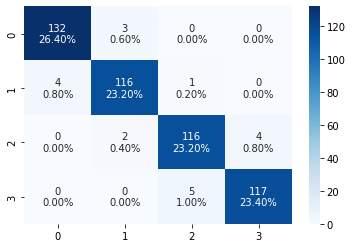

In [22]:
#sns.set(figsize(8,8))
group_counts = ["{0:0.0f}".format(value) for value in a.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     a.flatten()/np.sum(a)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(4,4)
sns.heatmap(a, annot=labels, fmt="", cmap='Blues')


# Ajout d'une feature "int memory"

In [23]:
dataset_clean2 = dataset[["price_range","battery_power","px_height","px_width","ram","int_memory"]]
dataset_clean2.head()

,price_range,battery_power,px_height,px_width,ram,int_memory
0,0,1954,512,1149,700,24
1,0,1445,386,836,1099,53
2,0,509,1137,1224,513,9
3,0,1866,356,563,373,52
4,0,775,862,1864,568,46


In [24]:
X2 = dataset_clean2[["battery_power","px_height","px_width","ram","int_memory"]]
X2

,battery_power,px_height,px_width,ram,int_memory
0,1954,512,1149,700,24
1,1445,386,836,1099,53
2,509,1137,1224,513,9
3,1866,356,563,373,52
4,775,862,1864,568,46
...,...,...,...,...,...
1995,1882,4,743,3579,44
1996,1467,888,1099,3962,18
1997,858,528,1416,3978,50
1998,1911,868,1632,3057,36


In [25]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_X2 = scaler_X2.transform(X2)
scaler_X2

array([[ 1.6286545 , -0.30001588, -0.23725421, -1.31329133, -0.44354893],
       [ 0.47001498, -0.58401083, -0.96163801, -0.94536656,  1.15502422],
       [-1.660607  ,  1.10868926, -0.06367982, -1.48572725, -1.27039711],
       ...,
       [-0.86617637, -0.26395303,  0.38067063,  1.70940891,  0.98965459],
       [ 1.53077336,  0.50238257,  0.88056489,  0.86013895,  0.21792962],
       [-1.65833069, -0.3653798 , -1.15141268,  1.65500399,  0.71403853]])

In [26]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(scaler_X2,y,random_state = 12,test_size=0.25)
print(x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape)

(1500, 5) (500, 5) (1500,) (500,)


In [27]:
import numpy as np
from sklearn.metrics import recall_score, precision_score, f1_score

clf2 = LogisticRegression().fit(x_train2, y_train2)
clf2.predict(x_train2)

score2 = clf2.score(x_test2, y_test2)
print(score2*100)
precision2 = precision_score(clf2.predict(x_test2), y_test2, average=None)
recall2 = recall_score(clf2.predict(x_test2), y_test2, average=None)
f1_score2 = f1_score(clf2.predict(x_test2), y_test2,average=None)
print("precision_score: ", precision2*100)
print("recall_score: ", recall2*100)
print("f1_score: ", f1_score2*100)
print("score_total: ", score2)

96.8
precision_score:  [97.77777778 97.52066116 95.08196721 96.72131148]
recall_score:  [98.50746269 95.93495935 95.8677686  96.72131148]
f1_score:  [98.14126394 96.72131148 95.47325103 96.72131148]
score_total:  0.968


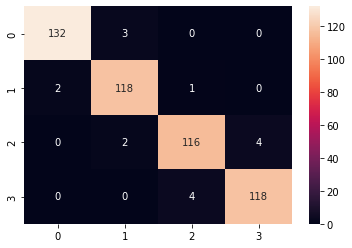

In [28]:
y_pred2 = clf2.predict(x_test2)
b = confusion_matrix(y_test2,y_pred2)
sns.heatmap(b,annot=True,fmt='0')

# Sans normalisation

In [29]:
X3 = dataset_clean2[["battery_power","px_height","px_width","ram","int_memory"]]
X3

,battery_power,px_height,px_width,ram,int_memory
0,1954,512,1149,700,24
1,1445,386,836,1099,53
2,509,1137,1224,513,9
3,1866,356,563,373,52
4,775,862,1864,568,46
...,...,...,...,...,...
1995,1882,4,743,3579,44
1996,1467,888,1099,3962,18
1997,858,528,1416,3978,50
1998,1911,868,1632,3057,36


In [30]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3,y,random_state = 12,test_size=0.25)
print(x_train3.shape, x_test3.shape, y_train3.shape, y_test3.shape)

(1500, 5) (500, 5) (1500,) (500,)


In [31]:
x_train3

,battery_power,px_height,px_width,ram,int_memory
1363,1237,18,1004,2528,13
1736,840,987,1081,3486,63
649,1919,304,1191,1391,48
522,1412,516,1894,837,25
1329,991,1209,1678,2014,12
...,...,...,...,...,...
1265,1330,1103,1637,2166,37
1277,618,1105,1602,2262,16
1414,1561,885,1811,1783,4
1691,977,1502,1862,3714,35


In [32]:
from sklearn.metrics import recall_score
clf3 = LogisticRegression(max_iter=5000).fit(x_train3, y_train3)
clf3.predict(x_train3)

score3 = clf3.score(x_test3, y_test3)
precision3 = precision_score(clf3.predict(x_test3), y_test3, average=None)
recall3 = recall_score(clf3.predict(x_test3), y_test3, average=None)
f1_score3 = f1_score(clf3.predict(x_test3), y_test3,average=None)
print("precision_score: ", precision3*100)
print("recall_score: ", recall3*100)
print("f1_score: ", f1_score3*100)
print("score_total: ", score3)

precision_score:  [97.77777778 96.69421488 95.90163934 96.72131148]
recall_score:  [97.77777778 96.69421488 95.90163934 96.72131148]
f1_score:  [97.77777778 96.69421488 95.90163934 96.72131148]
score_total:  0.968


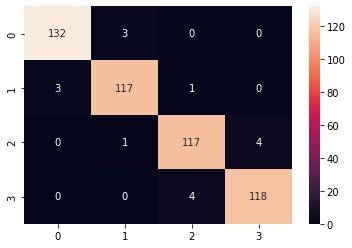

In [33]:
y_pred3 = clf3.predict(x_test3)
c = confusion_matrix(y_test3,y_pred3)
sns.heatmap(c,annot=True,fmt='0')